# 윈도우 환경에서 MeCab 설치하기  
https://cleancode-ws.tistory.com/97 참조

In [1]:
import MeCab

ModuleNotFoundError: ignored

In [0]:
m = MeCab.Tagger()
out = m.parse('미캅이 잘 설치되었는지 확인중입니다.')
print(out)

미	NNP,인명,F,미,*,*,*,*
캅	NNP,인명,T,캅,*,*,*,*
이	JKS,*,F,이,*,*,*,*
잘	MAG,*,T,잘,*,*,*,*
설치	NNG,행위,F,설치,*,*,*,*
되	XSV,*,F,되,*,*,*,*
었	EP,*,T,었,*,*,*,*
는지	EC,*,F,는지,*,*,*,*
확인	NNG,행위,T,확인,*,*,*,*
중	NNB,*,T,중,*,*,*,*
입니다	VCP+EF,*,F,입니다,Inflect,VCP,EF,이/VCP/*+ᄇ니다/EF/*
.	SF,*,*,*,*,*,*,*
EOS



In [0]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [0]:
import pandas as pd
data=pd.read_csv('daum_tip_new.csv')
data.head()

,Unnamed: 0,date,title,question,answer,answer2,answer3,answer4,Unnamed: 8
0,0,2019.10.08,[장애인복지] 장애인복지시설에서도 장애인자동차 표지 발급 가능한가요?,장애인복지시설도 장애인자동차 표지를 발급받을 수 있나요?,장애인복지법 제58조에 따른 장애인복지시설 및 동법 제63조에 따른 장애인복지단체...,,,,자동차 표지
1,1,2019.10.08,[장애인복지] 장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,"「장애인연금법」에 의한 장애인연금은 승계되지 않고, 실제 사망일이 속한 달까지 지...",,,,장애인 연금
2,2,2019.09.29,장애인과 연금공단,제가 국가에서 정한 장애인 입니다. 지체장애인이구요.그런데 엊그제 이야기를 들어서 ...,NaN,□ 보건복지부(장관 박능후)는 이러한 내용을 담은 장애인복지법 시행령 및 시행규칙...,2019년 7월부터 장애등급제가 폐지되어 종전 1~3급 장애인은 장애의 정도가 심...,NaN,장애인 급수
3,3,2019.09.29,[장애인복지] 장애인 등록,장애인 등록을 하고 싶은데 절차가 어떻게 되나요?,"장애유형은 총 15가지로 지체, 뇌병변, 시각, 청각, 언어, 안면, 지적, 자폐...",,,,장애인 등록
4,4,2019.10.08,[장애인복지] 장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장...,장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장애3급) 장애인연...,장애인연금은 만18세 이상으로 장애인연금법상 중증장애인(종전 1·2급 및 3급 중...,,,,장애인 연금


In [0]:
data=data.iloc[:373] # 라벨링 된 부분까지 
data

,Unnamed: 0,date,title,question,answer,answer2,answer3,answer4,Unnamed: 8
0,0,2019.10.08,[장애인복지] 장애인복지시설에서도 장애인자동차 표지 발급 가능한가요?,장애인복지시설도 장애인자동차 표지를 발급받을 수 있나요?,장애인복지법 제58조에 따른 장애인복지시설 및 동법 제63조에 따른 장애인복지단체...,,,,자동차 표지
1,1,2019.10.08,[장애인복지] 장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,"「장애인연금법」에 의한 장애인연금은 승계되지 않고, 실제 사망일이 속한 달까지 지...",,,,장애인 연금
2,2,2019.09.29,장애인과 연금공단,제가 국가에서 정한 장애인 입니다. 지체장애인이구요.그런데 엊그제 이야기를 들어서 ...,NaN,□ 보건복지부(장관 박능후)는 이러한 내용을 담은 장애인복지법 시행령 및 시행규칙...,2019년 7월부터 장애등급제가 폐지되어 종전 1~3급 장애인은 장애의 정도가 심...,NaN,장애인 급수
3,3,2019.09.29,[장애인복지] 장애인 등록,장애인 등록을 하고 싶은데 절차가 어떻게 되나요?,"장애유형은 총 15가지로 지체, 뇌병변, 시각, 청각, 언어, 안면, 지적, 자폐...",,,,장애인 등록
4,4,2019.10.08,[장애인복지] 장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장...,장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장애3급) 장애인연...,장애인연금은 만18세 이상으로 장애인연금법상 중증장애인(종전 1·2급 및 3급 중...,,,,장애인 연금
...,...,...,...,...,...,...,...,...,...
368,508,2010.07.28,[장애인복지] 장애인 차별,장애인이 차별을 받았을 경우 어떻게 해야 하나요 ?,장애를 이유로 고용.교육.재화와 용역의 제공 및 이용 등에서 차별을 받은 장애인 ...,,,,장애인 복지
369,509,2013.03.28,[재래시장/소상공인] 장애인기업 지원,안녕하세요 전 고양시에서 조그마하게 수배전반관련 사업을 시작한 김창호라고 합니다 사...,민원인께서는 산재를 당하신 이후 경제적 어려움을 극복하고 자립을 위해 다방면으로 노...,,,,장애인 복지
370,510,2012.01.11,[장애인복지] 장애인활동급여문의,"현재1급으로 한정되어있는 장애인활동급여지급문제를 2,3급으로 확대해주셨으면합니다 장...",장애인활동지원제도에 많은 관심을 가져주셔서 감사드립니다. 현재는 1급장애인을 대상...,,,,장애인 복지
371,511,2013.11.30,[장애인복지] 장애인보조기구 지원 기준 및 품목,"ㅇ 장애인보조기구를 지원받고 싶은데 지원 조건은 어떠하며, 지원 품목에는 뭐가 있나요?","장애인보조기구는 장애인복지법 제32조의 규정에 의거 등록한 지체, 뇌병변, 시각, ...",,,,장애인 복지


In [0]:
print('전체 학습데이터의 개수: {}'.format(len(data)))

전체 학습데이터의 개수: 373


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
Unnamed: 0    373 non-null int64
date          373 non-null object
title         373 non-null object
question      373 non-null object
answer        371 non-null object
answer2       359 non-null object
answer3       364 non-null object
answer4       365 non-null object
Unnamed: 8    373 non-null object
dtypes: int64(1), object(8)
memory usage: 26.4+ KB


# Character 단위 텍스트 길이 분포

In [0]:
data_lenght = data['question'].astype(str).apply(len)

Text(0, 0.5, 'Number of Question')

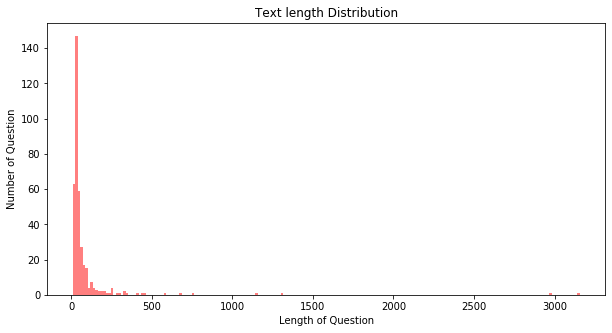

In [0]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(10, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(data_lenght, bins=200, alpha=0.5, color= 'r', label='word')
# plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Text length Distribution')
# 그래프 x 축 라벨
plt.xlabel('Length of Question')
# 그래프 y 축 라벨
plt.ylabel('Number of Question')

In [0]:
print('질문 길이 최대 값: {}'.format(np.max(data_lenght)))
print('질문 길이 최소 값: {}'.format(np.min(data_lenght)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(data_lenght)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(data_lenght)))
print('질문 길이 중간 값: {}'.format(np.median(data_lenght)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('질문 길이 제 1 사분위: {}'.format(np.percentile(data_lenght, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(data_lenght, 75)))

질문 길이 최대 값: 3157
질문 길이 최소 값: 8
질문 길이 평균 값: 83.41
질문 길이 표준편차: 249.45
질문 길이 중간 값: 35.0
질문 길이 제 1 사분위: 26.0
질문 길이 제 3 사분위: 62.0


# Word 단위 텍스트 길이 분포

In [0]:
data_word_counts = data['question'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of questions')

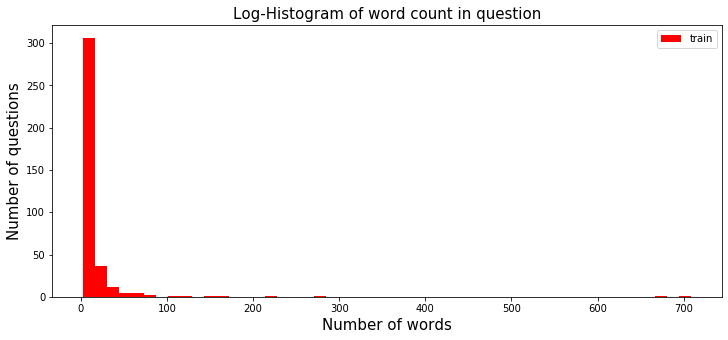

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(data_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in question', fontsize=15)
# plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of questions', fontsize=15)

In [0]:
print('질문 단어 개수 최대 값: {}'.format(np.max(data_word_counts)))
print('질문 단어 개수 최소 값: {}'.format(np.min(data_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(data_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(data_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(data_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(data_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(data_word_counts, 75)))

질문 단어 개수 최대 값: 709
질문 단어 개수 최소 값: 2
질문 단어 개수 평균 값: 17.67
질문 단어 개수 표준편차: 55.05
질문 단어 개수 중간 값: 8.0
질문 단어 개수 제 1 사분위: 5.0
질문 단어 개수 제 3 사분위: 13.0


# 데이터 전처리


### RegEx를 활용한 텍스트 필터링

모델에서 다뤄야 할 단어가 너무 많아도 문제가 되는 경우가 있습니다.

이를 제어하기 위해 한글 데이터만을 받도록 regex를 통해 처리합니다.
RegEx를 활용한 텍스트 필터링
모델에서 다뤄야 할 단어가 너무 많아도 문제가 되는 경우가 있습니다.

이를 제어하기 위해 한글 데이터만을 받도록 regex를 통해 처리합니다.

In [0]:
data

,Unnamed: 0,date,title,question,answer,answer2,answer3,answer4,Unnamed: 8
0,0,2019.10.08,[장애인복지] 장애인복지시설에서도 장애인자동차 표지 발급 가능한가요?,장애인복지시설도 장애인자동차 표지를 발급받을 수 있나요?,장애인복지법 제58조에 따른 장애인복지시설 및 동법 제63조에 따른 장애인복지단체...,,,,자동차 표지
1,1,2019.10.08,[장애인복지] 장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,"「장애인연금법」에 의한 장애인연금은 승계되지 않고, 실제 사망일이 속한 달까지 지...",,,,장애인 연금
2,2,2019.09.29,장애인과 연금공단,제가 국가에서 정한 장애인 입니다. 지체장애인이구요.그런데 엊그제 이야기를 들어서 ...,NaN,□ 보건복지부(장관 박능후)는 이러한 내용을 담은 장애인복지법 시행령 및 시행규칙...,2019년 7월부터 장애등급제가 폐지되어 종전 1~3급 장애인은 장애의 정도가 심...,NaN,장애인 급수
3,3,2019.09.29,[장애인복지] 장애인 등록,장애인 등록을 하고 싶은데 절차가 어떻게 되나요?,"장애유형은 총 15가지로 지체, 뇌병변, 시각, 청각, 언어, 안면, 지적, 자폐...",,,,장애인 등록
4,4,2019.10.08,[장애인복지] 장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장...,장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장애3급) 장애인연...,장애인연금은 만18세 이상으로 장애인연금법상 중증장애인(종전 1·2급 및 3급 중...,,,,장애인 연금
...,...,...,...,...,...,...,...,...,...
368,508,2010.07.28,[장애인복지] 장애인 차별,장애인이 차별을 받았을 경우 어떻게 해야 하나요 ?,장애를 이유로 고용.교육.재화와 용역의 제공 및 이용 등에서 차별을 받은 장애인 ...,,,,장애인 복지
369,509,2013.03.28,[재래시장/소상공인] 장애인기업 지원,안녕하세요 전 고양시에서 조그마하게 수배전반관련 사업을 시작한 김창호라고 합니다 사...,민원인께서는 산재를 당하신 이후 경제적 어려움을 극복하고 자립을 위해 다방면으로 노...,,,,장애인 복지
370,510,2012.01.11,[장애인복지] 장애인활동급여문의,"현재1급으로 한정되어있는 장애인활동급여지급문제를 2,3급으로 확대해주셨으면합니다 장...",장애인활동지원제도에 많은 관심을 가져주셔서 감사드립니다. 현재는 1급장애인을 대상...,,,,장애인 복지
371,511,2013.11.30,[장애인복지] 장애인보조기구 지원 기준 및 품목,"ㅇ 장애인보조기구를 지원받고 싶은데 지원 조건은 어떠하며, 지원 품목에는 뭐가 있나요?","장애인보조기구는 장애인복지법 제32조의 규정에 의거 등록한 지체, 뇌병변, 시각, ...",,,,장애인 복지


In [0]:
# 복사본 생성 
data2 = data
data2

,Unnamed: 0,date,title,question,answer,answer2,answer3,answer4,Unnamed: 8
0,0,2019.10.08,[장애인복지] 장애인복지시설에서도 장애인자동차 표지 발급 가능한가요?,장애인복지시설도 장애인자동차 표지를 발급받을 수 있나요?,장애인복지법 제58조에 따른 장애인복지시설 및 동법 제63조에 따른 장애인복지단체...,,,,자동차 표지
1,1,2019.10.08,[장애인복지] 장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,"「장애인연금법」에 의한 장애인연금은 승계되지 않고, 실제 사망일이 속한 달까지 지...",,,,장애인 연금
2,2,2019.09.29,장애인과 연금공단,제가 국가에서 정한 장애인 입니다. 지체장애인이구요.그런데 엊그제 이야기를 들어서 ...,NaN,□ 보건복지부(장관 박능후)는 이러한 내용을 담은 장애인복지법 시행령 및 시행규칙...,2019년 7월부터 장애등급제가 폐지되어 종전 1~3급 장애인은 장애의 정도가 심...,NaN,장애인 급수
3,3,2019.09.29,[장애인복지] 장애인 등록,장애인 등록을 하고 싶은데 절차가 어떻게 되나요?,"장애유형은 총 15가지로 지체, 뇌병변, 시각, 청각, 언어, 안면, 지적, 자폐...",,,,장애인 등록
4,4,2019.10.08,[장애인복지] 장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장...,장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장애3급) 장애인연...,장애인연금은 만18세 이상으로 장애인연금법상 중증장애인(종전 1·2급 및 3급 중...,,,,장애인 연금
...,...,...,...,...,...,...,...,...,...
368,508,2010.07.28,[장애인복지] 장애인 차별,장애인이 차별을 받았을 경우 어떻게 해야 하나요 ?,장애를 이유로 고용.교육.재화와 용역의 제공 및 이용 등에서 차별을 받은 장애인 ...,,,,장애인 복지
369,509,2013.03.28,[재래시장/소상공인] 장애인기업 지원,안녕하세요 전 고양시에서 조그마하게 수배전반관련 사업을 시작한 김창호라고 합니다 사...,민원인께서는 산재를 당하신 이후 경제적 어려움을 극복하고 자립을 위해 다방면으로 노...,,,,장애인 복지
370,510,2012.01.11,[장애인복지] 장애인활동급여문의,"현재1급으로 한정되어있는 장애인활동급여지급문제를 2,3급으로 확대해주셨으면합니다 장...",장애인활동지원제도에 많은 관심을 가져주셔서 감사드립니다. 현재는 1급장애인을 대상...,,,,장애인 복지
371,511,2013.11.30,[장애인복지] 장애인보조기구 지원 기준 및 품목,"ㅇ 장애인보조기구를 지원받고 싶은데 지원 조건은 어떠하며, 지원 품목에는 뭐가 있나요?","장애인보조기구는 장애인복지법 제32조의 규정에 의거 등록한 지체, 뇌병변, 시각, ...",,,,장애인 복지


In [0]:
# 한글만 남기기
import re

for i in range(len(data['question'])):
    data2['question'][i]=re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", data['question'][i])
    
data2

C:\Users\yuna1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,date,title,question,answer,answer2,answer3,answer4,Unnamed: 8
0,0,2019.10.08,[장애인복지] 장애인복지시설에서도 장애인자동차 표지 발급 가능한가요?,장애인복지시설도 장애인자동차 표지를 발급받을 수 있나요,장애인복지법 제58조에 따른 장애인복지시설 및 동법 제63조에 따른 장애인복지단체...,,,,자동차 표지
1,1,2019.10.08,[장애인복지] 장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요?,장애인연금을 받던 중 사망한 경우 배우자에게 장애인연금이 승계되나요,"「장애인연금법」에 의한 장애인연금은 승계되지 않고, 실제 사망일이 속한 달까지 지...",,,,장애인 연금
2,2,2019.09.29,장애인과 연금공단,제가 국가에서 정한 장애인 입니다 지체장애인이구요그런데 엊그제 이야기를 들어서 사실...,NaN,□ 보건복지부(장관 박능후)는 이러한 내용을 담은 장애인복지법 시행령 및 시행규칙...,2019년 7월부터 장애등급제가 폐지되어 종전 1~3급 장애인은 장애의 정도가 심...,NaN,장애인 급수
3,3,2019.09.29,[장애인복지] 장애인 등록,장애인 등록을 하고 싶은데 절차가 어떻게 되나요,"장애유형은 총 15가지로 지체, 뇌병변, 시각, 청각, 언어, 안면, 지적, 자폐...",,,,장애인 등록
4,4,2019.10.08,[장애인복지] 장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데(종전 장...,장애의 정도가 심한 장애인이나 장애인연금법상 중증이 아닌데종전 장애급 장애인연금을 ...,장애인연금은 만18세 이상으로 장애인연금법상 중증장애인(종전 1·2급 및 3급 중...,,,,장애인 연금
...,...,...,...,...,...,...,...,...,...
368,508,2010.07.28,[장애인복지] 장애인 차별,장애인이 차별을 받았을 경우 어떻게 해야 하나요,장애를 이유로 고용.교육.재화와 용역의 제공 및 이용 등에서 차별을 받은 장애인 ...,,,,장애인 복지
369,509,2013.03.28,[재래시장/소상공인] 장애인기업 지원,안녕하세요 전 고양시에서 조그마하게 수배전반관련 사업을 시작한 김창호라고 합니다 사...,민원인께서는 산재를 당하신 이후 경제적 어려움을 극복하고 자립을 위해 다방면으로 노...,,,,장애인 복지
370,510,2012.01.11,[장애인복지] 장애인활동급여문의,현재급으로 한정되어있는 장애인활동급여지급문제를 급으로 확대해주셨으면합니다 장애인들은...,장애인활동지원제도에 많은 관심을 가져주셔서 감사드립니다. 현재는 1급장애인을 대상...,,,,장애인 복지
371,511,2013.11.30,[장애인복지] 장애인보조기구 지원 기준 및 품목,ㅇ 장애인보조기구를 지원받고 싶은데 지원 조건은 어떠하며 지원 품목에는 뭐가 있나요,"장애인보조기구는 장애인복지법 제32조의 규정에 의거 등록한 지체, 뇌병변, 시각, ...",,,,장애인 복지


https://m.blog.naver.com/PostView.nhn?blogId=aul-_-&logNo=221557243190&proxyReferer=https%3A%2F%2Fwww.google.com%2F  
mecab 참조

In [0]:
from konlpy.tag import Mecab

In [0]:
! pip install konlpy

In [0]:
mecab = Mecab()

Exception: The MeCab dictionary does not exist at "/usr/local/lib/mecab/dic/mecab-ko-dic". Is the dictionary correctly installed?
You can also try entering the dictionary path when initializing the Mecab class: "Mecab('/some/dic/path')"

In [0]:
# Meacb사용 형태소 분석 
text_pos=[]

for text in range(data2['question']):
    text_pos.append(tagger.pos(text))
    
text_pos

In [0]:
# Meacb사용 형태소 분석 
text_morphs=[]

for text in range(data2['question']):
    text_morphs.append(tagger.morphs(text))
    
text_morphs

In [0]:
# 불용어 사전을 활용한 텍스트  필터링
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])

clean_question=[]
clean_question.append([token for token in text_morphs if not token in stop_words])
print(clean_question)

# 한번에 작업

In [0]:
def preprocessing(text, MeCab, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # MeCab : MeCab 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    text_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", text)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    text_token = tagger.morphs(text_clean)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        text_cleaned = [token for token in text_token if not token in stop_words]
        
   
    return text_cleaned

In [0]:
from tqdm import tqdm
from eunjeon import Mecab
tagger=Mecab()
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
clean_question = []

for review in tqdm(data['question']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_question.append(preprocessing(review, MeCab, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_question.append([])  #string이 아니면 비어있는 값 추가

100%|███████████████████████████████████████████████████████████████████████████████| 373/373 [00:00<00:00, 634.96it/s]


In [0]:
clean_question

[['장',
  '애',
  '\t',
  'N',
  'N',
  'G',
  ',',
  '*',
  ',',
  'F',
  ',',
  '장',
  '애',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  '\n',
  '인',
  '\t',
  'V',
  'C',
  'P',
  '+',
  'E',
  'T',
  'M',
  ',',
  '*',
  ',',
  'T',
  ',',
  '인',
  ',',
  'I',
  'n',
  'f',
  'l',
  'e',
  'c',
  't',
  ',',
  'V',
  'C',
  'P',
  ',',
  'E',
  'T',
  'M',
  ',',
  '/',
  'V',
  'C',
  'P',
  '/',
  '*',
  '+',
  'ᆫ',
  '/',
  'E',
  'T',
  'M',
  '/',
  '*',
  '\n',
  '복',
  '지',
  '\t',
  'N',
  'N',
  'G',
  ',',
  '정',
  '적',
  '사',
  '태',
  ',',
  'F',
  ',',
  '복',
  '지',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  '\n',
  '시',
  '설',
  '\t',
  'N',
  'N',
  'G',
  ',',
  '*',
  ',',
  'T',
  ',',
  '시',
  '설',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  '\n',
  '도',
  '\t',
  'J',
  'X',
  ',',
  '*',
  ',',
  'F',
  ',',
  '도',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  ',',
  '*',
  '\n',
  '장',
  '애',
  '\t',
  'N',
  'N',
  'G',
  

# 단어사전 생성 및 인덱싱

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_question)
sequences = tokenizer.texts_to_sequences(clean_question)

In [0]:
print(sequences[:5])

In [0]:
word_to_index = tokenizer.word_index
print(word_to_index)

In [0]:
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [0]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

직관적으로 변수를 기억하기위해 X_data에 대해서 정수 인코딩 된 결과인 sequences를 X_data로 변경하고, 전체 데이터에서 가장 길이가 긴 메일과 전체 메일 데이터의 길이 분포를 알아보도록 하겠습니다.

In [0]:
X_data=sequences
print('질문의 최대 길이 : %d' % max(len(l) for l in X_data))
print('질문의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

가장 긴 메일의 길이는 189이며, 전체 데이터의 길이 분포는 대체적으로 약 50이하의 길이를 가지는 것을 볼 수 있습니다.

In [0]:
max_len = 189
# 전체 데이터셋의 길이는 189로 맞춥니다.
data = pad_sequences(X_data, maxlen=max_len)
print("data shape: ", data.shape)

maxlen에는 가장 긴 메일의 길이였던 189이라는 숫자를 넣었습니다. 이는 5,572개의 X_data의 길이를 전부 189로 바꿉니다. 189보다 길이가 짧은 메일 샘플은 전부 숫자 0이 패딩되어 189의 길이를 가지게 됩니다.